<a href="https://colab.research.google.com/github/UN-GCPDS/Curso-Corto-LLMs/blob/main/3.%20Dashboard/Resumen_Dashboard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Logo UNAL CHEC](https://github.com/UN-GCPDS/curso_IA_CHEC/blob/main/logo_unal_chec.jpg?raw=1)

# **Resumen Dashboard**

## **Descripción**


### **Profesor - Sesión 1:** Andrés Marino Álvarez Meza y Diego Armando Pérez Rosero

'dash_call_graph_spaced.png'

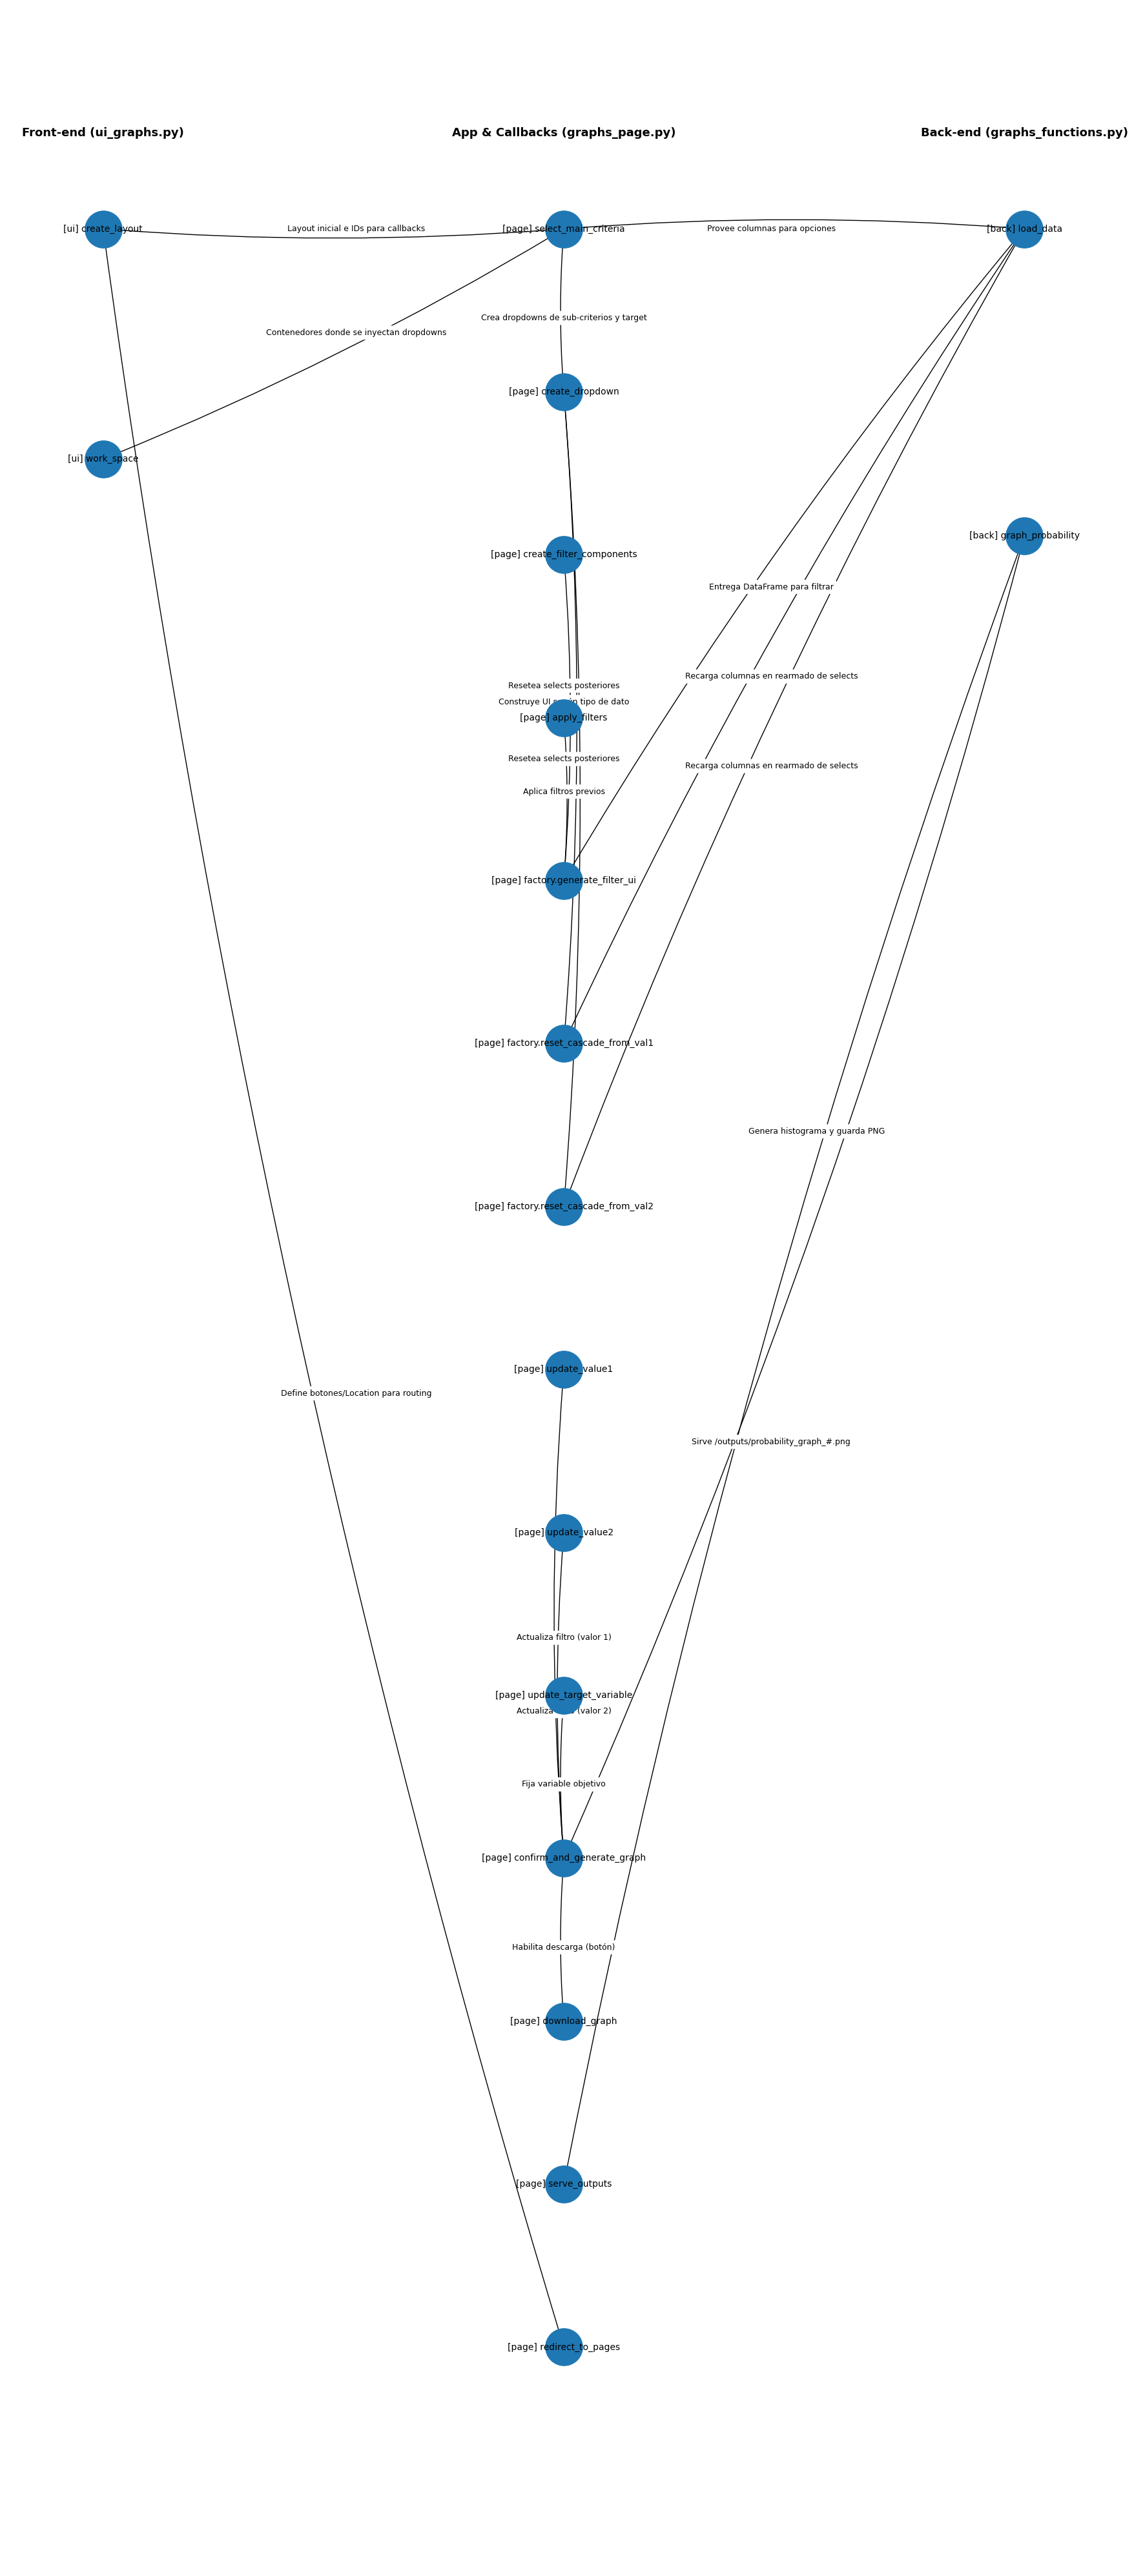

In [28]:
#@title Graphs
import matplotlib.pyplot as plt
import networkx as nx

ui_nodes = [
    "[ui] create_layout",
    "[ui] work_space",
]

page_nodes = [
    "[page] select_main_criteria",
    "[page] create_dropdown",
    "[page] create_filter_components",
    "[page] apply_filters",
    "[page] factory.generate_filter_ui",
    "[page] factory.reset_cascade_from_val1",
    "[page] factory.reset_cascade_from_val2",
    "[page] update_value1",
    "[page] update_value2",
    "[page] update_target_variable",
    "[page] confirm_and_generate_graph",
    "[page] download_graph",
    "[page] serve_outputs",
    "[page] redirect_to_pages",
]

back_nodes = [
    "[back] load_data",
    "[back] graph_probability",
]

edges = [
    ("[ui] create_layout", "[page] select_main_criteria", "Layout inicial e IDs para callbacks"),
    ("[ui] work_space", "[page] select_main_criteria", "Contenedores donde se inyectan dropdowns"),
    ("[back] load_data", "[page] select_main_criteria", "Provee columnas para opciones"),
    ("[back] load_data", "[page] factory.generate_filter_ui", "Entrega DataFrame para filtrar"),
    ("[back] load_data", "[page] factory.reset_cascade_from_val1", "Recarga columnas en rearmado de selects"),
    ("[back] load_data", "[page] factory.reset_cascade_from_val2", "Recarga columnas en rearmado de selects"),
    ("[page] select_main_criteria", "[page] create_dropdown", "Crea dropdowns de sub-criterios y target"),
    ("[page] factory.generate_filter_ui", "[page] apply_filters", "Aplica filtros previos"),
    ("[page] factory.generate_filter_ui", "[page] create_filter_components", "Construye UI según tipo de dato"),
    ("[page] factory.reset_cascade_from_val1", "[page] create_dropdown", "Resetea selects posteriores"),
    ("[page] factory.reset_cascade_from_val2", "[page] create_dropdown", "Resetea selects posteriores"),
    ("[page] update_value1", "[page] confirm_and_generate_graph", "Actualiza filtro (valor 1)"),
    ("[page] update_value2", "[page] confirm_and_generate_graph", "Actualiza filtro (valor 2)"),
    ("[page] update_target_variable", "[page] confirm_and_generate_graph", "Fija variable objetivo"),
    ("[page] confirm_and_generate_graph", "[back] graph_probability", "Genera histograma y guarda PNG"),
    ("[back] graph_probability", "[page] serve_outputs", "Sirve /outputs/probability_graph_#.png"),
    ("[page] confirm_and_generate_graph", "[page] download_graph", "Habilita descarga (botón)"),
    ("[ui] create_layout", "[page] redirect_to_pages", "Define botones/Location para routing"),
]

G = nx.DiGraph()
G.add_nodes_from(ui_nodes + page_nodes + back_nodes)
for u, v, lbl in edges:
    G.add_edge(u, v, label=lbl)

pos = {}
def stack_positions(nodes, x, y_start=1.1, y_step=0.09):
    for i, n in enumerate(nodes):
        pos[n] = (x, y_start - i * y_step)

# Wider vertical spacing specifically for graphs_page.py
stack_positions(ui_nodes,   x=0.0, y_start=1.0, y_step=0.12)
stack_positions(page_nodes, x=0.5, y_start=1, y_step=0.085)  # <- increased spacing
stack_positions(back_nodes, x=1, y_start=1.0, y_step=0.16)

plt.figure(figsize=(18, 40))  # Taller figure for readability

nx.draw_networkx_nodes(G, pos, node_size=1700)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', arrowsize=14, connectionstyle='arc3,rad=0.04')

edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, label_pos=0.55, rotate=False)

plt.text(0.0, 1.05, "Front-end (ui_graphs.py)", ha='center', va='center', fontsize=13, fontweight='bold')
plt.text(0.5, 1.05, "App & Callbacks (graphs_page.py)", ha='center', va='center', fontsize=13, fontweight='bold')
plt.text(1, 1.05, "Back-end (graphs_functions.py)", ha='center', va='center', fontsize=13, fontweight='bold')

plt.axis('off')
out_path = "dash_call_graph_spaced.png"
plt.tight_layout()
plt.savefig(out_path, dpi=170, bbox_inches='tight')
out_path


'dash_tabnet_call_graph.png'

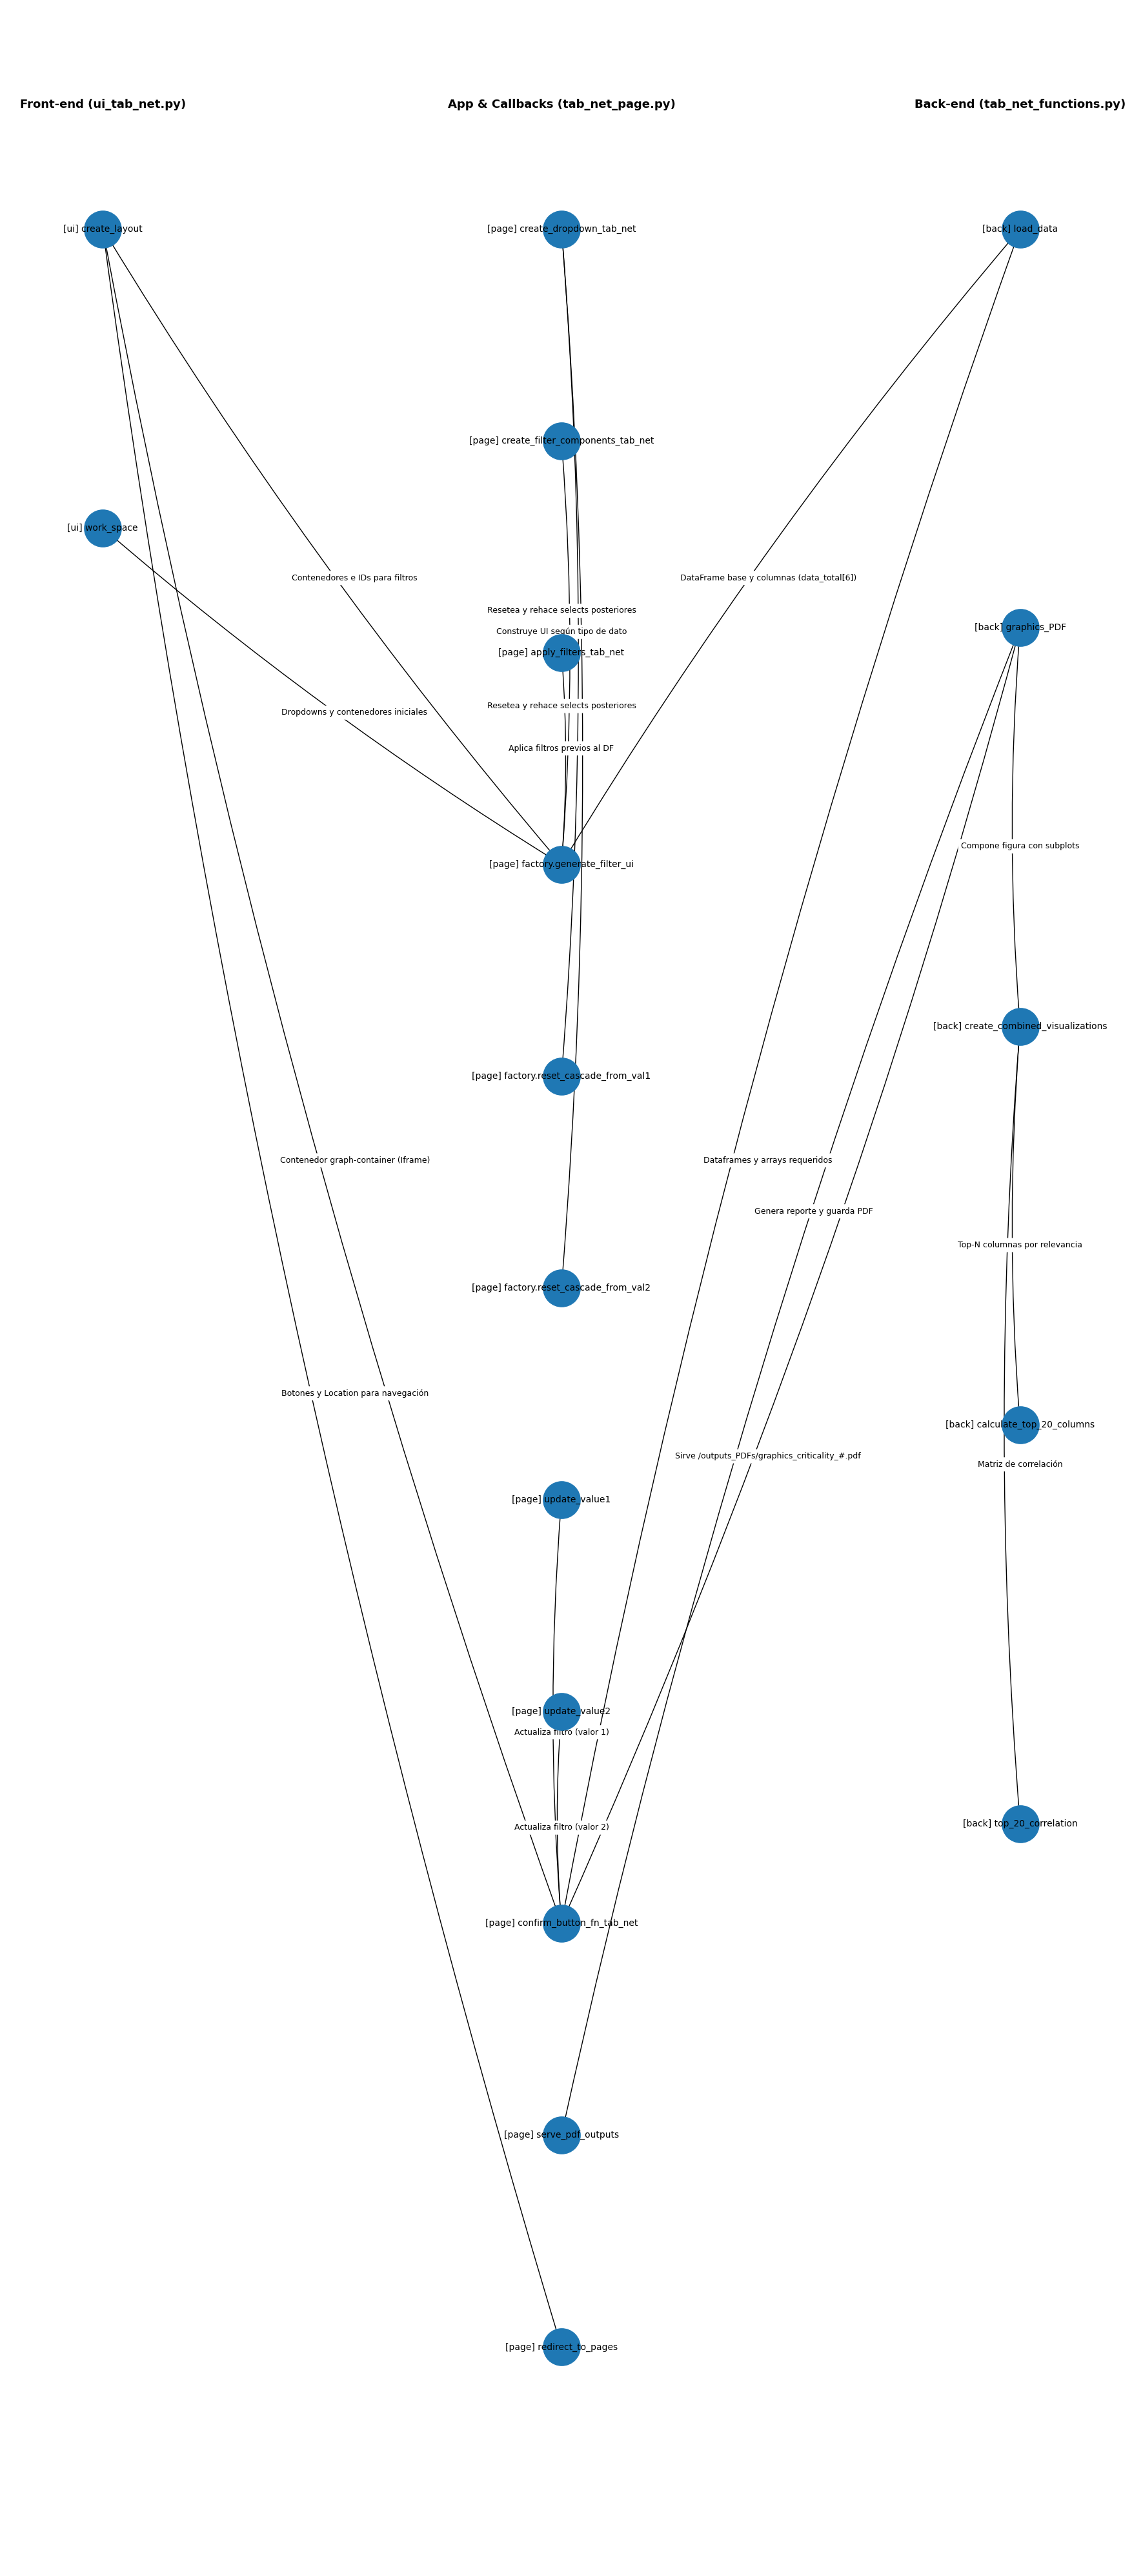

In [31]:
# @title Tab-net
import matplotlib.pyplot as plt
import networkx as nx

ui_nodes = [
    "[ui] create_layout",
    "[ui] work_space",
]

page_nodes = [
    "[page] create_dropdown_tab_net",
    "[page] create_filter_components_tab_net",
    "[page] apply_filters_tab_net",
    "[page] factory.generate_filter_ui",
    "[page] factory.reset_cascade_from_val1",
    "[page] factory.reset_cascade_from_val2",
    "[page] update_value1",
    "[page] update_value2",
    "[page] confirm_button_fn_tab_net",
    "[page] serve_pdf_outputs",
    "[page] redirect_to_pages",
]

back_nodes = [
    "[back] load_data",
    "[back] graphics_PDF",
    "[back] create_combined_visualizations",
    "[back] calculate_top_20_columns",
    "[back] top_20_correlation",
]

edges = [
    ("[ui] create_layout", "[page] factory.generate_filter_ui", "Contenedores e IDs para filtros"),
    ("[ui] work_space", "[page] factory.generate_filter_ui", "Dropdowns y contenedores iniciales"),
    ("[ui] create_layout", "[page] confirm_button_fn_tab_net", "Contenedor graph-container (Iframe)"),
    ("[ui] create_layout", "[page] redirect_to_pages", "Botones y Location para navegación"),
    ("[back] load_data", "[page] factory.generate_filter_ui", "DataFrame base y columnas (data_total[6])"),
    ("[back] load_data", "[page] confirm_button_fn_tab_net", "Dataframes y arrays requeridos"),
    ("[page] factory.generate_filter_ui", "[page] apply_filters_tab_net", "Aplica filtros previos al DF"),
    ("[page] factory.generate_filter_ui", "[page] create_filter_components_tab_net", "Construye UI según tipo de dato"),
    ("[page] factory.reset_cascade_from_val1", "[page] create_dropdown_tab_net", "Resetea y rehace selects posteriores"),
    ("[page] factory.reset_cascade_from_val2", "[page] create_dropdown_tab_net", "Resetea y rehace selects posteriores"),
    ("[page] update_value1", "[page] confirm_button_fn_tab_net", "Actualiza filtro (valor 1)"),
    ("[page] update_value2", "[page] confirm_button_fn_tab_net", "Actualiza filtro (valor 2)"),
    ("[page] confirm_button_fn_tab_net", "[back] graphics_PDF", "Genera reporte y guarda PDF"),
    ("[back] graphics_PDF", "[back] create_combined_visualizations", "Compone figura con subplots"),
    ("[back] create_combined_visualizations", "[back] calculate_top_20_columns", "Top-N columnas por relevancia"),
    ("[back] create_combined_visualizations", "[back] top_20_correlation", "Matriz de correlación"),
    ("[back] graphics_PDF", "[page] serve_pdf_outputs", "Sirve /outputs_PDFs/graphics_criticality_#.pdf"),
]

G = nx.DiGraph()
G.add_nodes_from(ui_nodes + page_nodes + back_nodes)
for u, v, lbl in edges:
    G.add_edge(u, v, label=lbl)

pos = {}
def stack_positions(nodes, x, y_start=1.1, y_step=0.09):
    for i, n in enumerate(nodes):
        pos[n] = (x, y_start - i * y_step)

stack_positions(ui_nodes,   x=0.0,  y_start=1.0, y_step=0.12)
stack_positions(page_nodes, x=0.5, y_start=1.0, y_step=0.085)
stack_positions(back_nodes, x=1.0,  y_start=1.0, y_step=0.16)

plt.figure(figsize=(18, 40))
nx.draw_networkx_nodes(G, pos, node_size=1700)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', arrowsize=14, connectionstyle='arc3,rad=0.04')

edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, label_pos=0.55, rotate=False)

plt.text(0.0, 1.05, "Front-end (ui_tab_net.py)", ha='center', va='center', fontsize=13, fontweight='bold')
plt.text(0.5, 1.05, "App & Callbacks (tab_net_page.py)", ha='center', va='center', fontsize=13, fontweight='bold')
plt.text(1.0, 1.05, "Back-end (tab_net_functions.py)", ha='center', va='center', fontsize=13, fontweight='bold')

plt.axis('off')
out_path = "dash_tabnet_call_graph.png"
plt.tight_layout()
plt.savefig(out_path, dpi=170, bbox_inches='tight')
out_path


'dash_chat_call_graph_5cols.png'

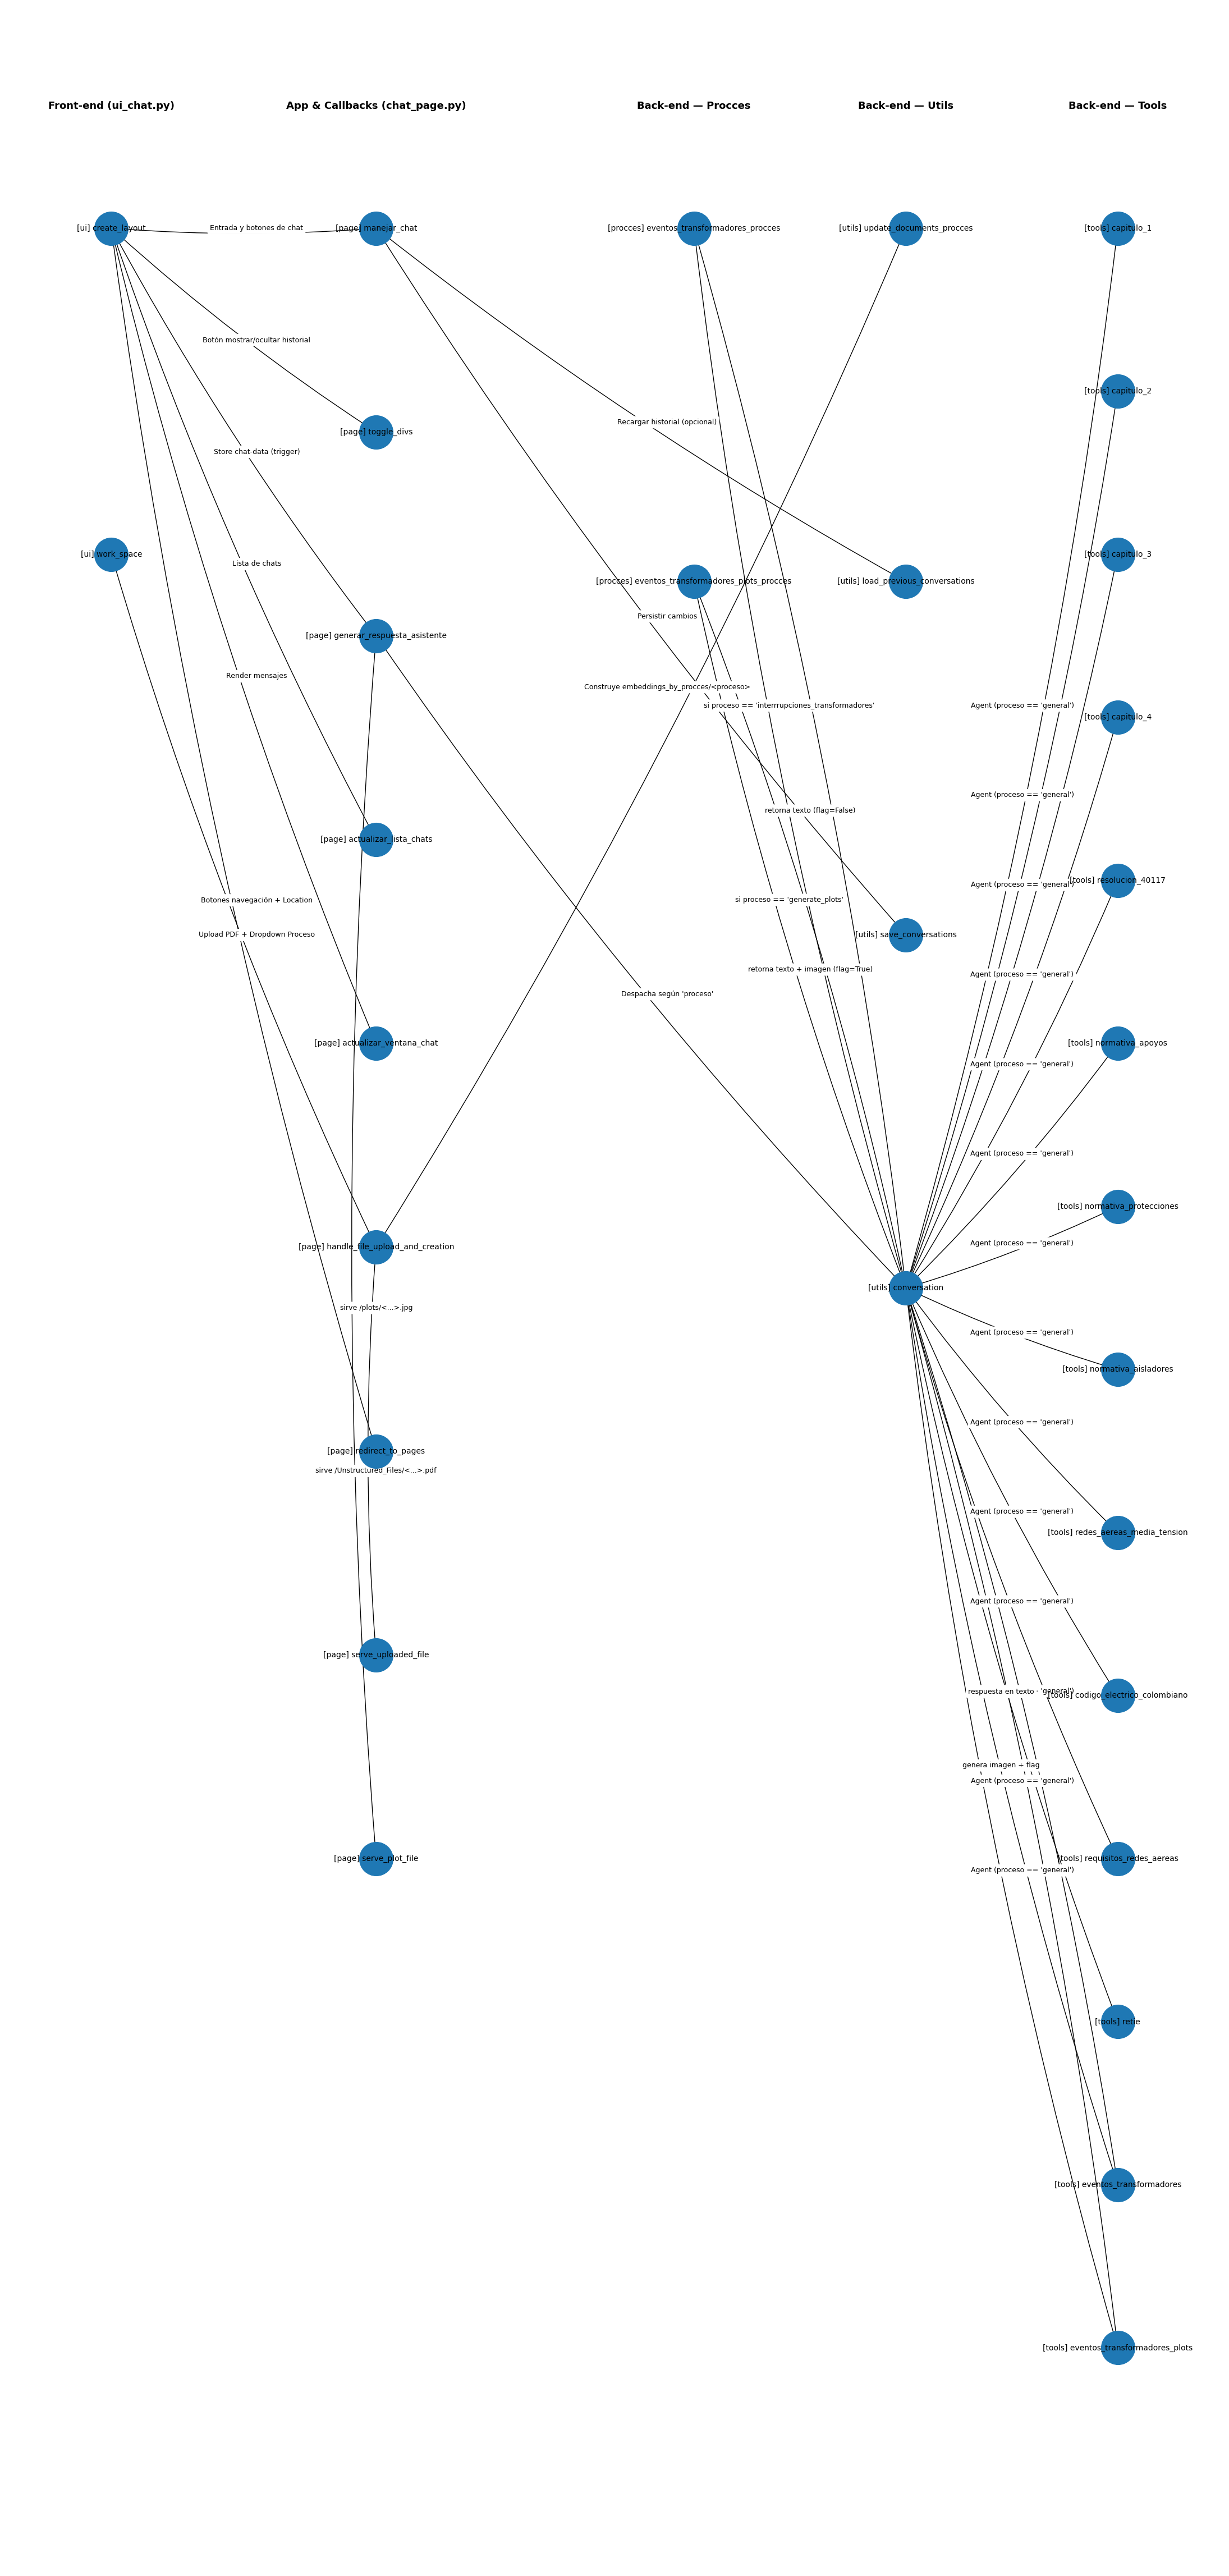

In [2]:
# @title Chat
import matplotlib.pyplot as plt
import networkx as nx

# ==== Column nodes ====
ui_nodes = [
    "[ui] create_layout",
    "[ui] work_space",
]

page_nodes = [
    "[page] manejar_chat",
    "[page] toggle_divs",
    "[page] generar_respuesta_asistente",
    "[page] actualizar_lista_chats",
    "[page] actualizar_ventana_chat",
    "[page] handle_file_upload_and_creation",
    "[page] redirect_to_pages",
    "[page] serve_uploaded_file",
    "[page] serve_plot_file",
]

procces_nodes = [
    "[procces] eventos_transformadores_procces",
    "[procces] eventos_transformadores_plots_procces",
]

utils_nodes = [
    "[utils] update_documents_procces",
    "[utils] load_previous_conversations",
    "[utils] save_conversations",
    "[utils] conversation",
]

tools_nodes = [
    "[tools] capitulo_1",
    "[tools] capitulo_2",
    "[tools] capitulo_3",
    "[tools] capitulo_4",
    "[tools] resolucion_40117",
    "[tools] normativa_apoyos",
    "[tools] normativa_protecciones",
    "[tools] normativa_aisladores",
    "[tools] redes_aereas_media_tension",
    "[tools] codigo_electrico_colombiano",
    "[tools] requisitos_redes_aereas",
    "[tools] retie",
    "[tools] eventos_transformadores",
    "[tools] eventos_transformadores_plots",
]

# ==== Edges (only real flow — recommendation branch excluded) ====
edges = [
    # UI -> Page
    ("[ui] create_layout", "[page] manejar_chat", "Entrada y botones de chat"),
    ("[ui] create_layout", "[page] toggle_divs", "Botón mostrar/ocultar historial"),
    ("[ui] work_space", "[page] handle_file_upload_and_creation", "Upload PDF + Dropdown Proceso"),
    ("[ui] create_layout", "[page] generar_respuesta_asistente", "Store chat-data (trigger)"),
    ("[ui] create_layout", "[page] actualizar_lista_chats", "Lista de chats"),
    ("[ui] create_layout", "[page] actualizar_ventana_chat", "Render mensajes"),
    ("[ui] create_layout", "[page] redirect_to_pages", "Botones navegación + Location"),

    # Page -> Utils
    ("[page] manejar_chat", "[utils] save_conversations", "Persistir cambios"),
    ("[page] manejar_chat", "[utils] load_previous_conversations", "Recargar historial (opcional)"),
    ("[page] generar_respuesta_asistente", "[utils] conversation", "Despacha según 'proceso'"),
    ("[page] handle_file_upload_and_creation", "[utils] update_documents_procces", "Construye embeddings_by_procces/<proceso>"),

    # Utils (conversation) -> Procces
    ("[utils] conversation", "[procces] eventos_transformadores_procces", "si proceso == 'interrrupciones_transformadores'"),
    ("[utils] conversation", "[procces] eventos_transformadores_plots_procces", "si proceso == 'generate_plots'"),

    # Procces -> Utils (conversation returns to page)
    ("[procces] eventos_transformadores_procces", "[utils] conversation", "retorna texto (flag=False)"),
    ("[procces] eventos_transformadores_plots_procces", "[utils] conversation", "retorna texto + imagen (flag=True)"),

    # Utils (conversation) -> Tools (Agent path when proceso == 'general')
    ("[utils] conversation", "[tools] capitulo_1", "Agent (proceso == 'general')"),
    ("[utils] conversation", "[tools] capitulo_2", "Agent (proceso == 'general')"),
    ("[utils] conversation", "[tools] capitulo_3", "Agent (proceso == 'general')"),
    ("[utils] conversation", "[tools] capitulo_4", "Agent (proceso == 'general')"),
    ("[utils] conversation", "[tools] resolucion_40117", "Agent (proceso == 'general')"),
    ("[utils] conversation", "[tools] normativa_apoyos", "Agent (proceso == 'general')"),
    ("[utils] conversation", "[tools] normativa_protecciones", "Agent (proceso == 'general')"),
    ("[utils] conversation", "[tools] normativa_aisladores", "Agent (proceso == 'general')"),
    ("[utils] conversation", "[tools] redes_aereas_media_tension", "Agent (proceso == 'general')"),
    ("[utils] conversation", "[tools] codigo_electrico_colombiano", "Agent (proceso == 'general')"),
    ("[utils] conversation", "[tools] requisitos_redes_aereas", "Agent (proceso == 'general')"),
    ("[utils] conversation", "[tools] retie", "Agent (proceso == 'general')"),
    ("[utils] conversation", "[tools] eventos_transformadores", "Agent (proceso == 'general')"),
    ("[utils] conversation", "[tools] eventos_transformadores_plots", "Agent (proceso == 'general')"),

    # Tools -> Utils (conversation accumulates response / image flag via number_iteration logic)
    ("[tools] eventos_transformadores", "[utils] conversation", "respuesta en texto"),
    ("[tools] eventos_transformadores_plots", "[utils] conversation", "genera imagen + flag"),

    # Serving routes
    ("[page] generar_respuesta_asistente", "[page] serve_plot_file", "sirve /plots/<...>.jpg"),
    ("[page] handle_file_upload_and_creation", "[page] serve_uploaded_file", "sirve /Unstructured_Files/<...>.pdf"),
]

# ==== Build graph ====
G = nx.DiGraph()
G.add_nodes_from(ui_nodes + page_nodes + procces_nodes + utils_nodes + tools_nodes)
for u, v, lbl in edges:
    G.add_edge(u, v, label=lbl)

# ==== Layout positions ====
pos = {}

def stack_positions(nodes, x, y_start=1.0, y_step=0.08):
    for i, n in enumerate(nodes):
        pos[n] = (x, y_start - i * y_step)

# Five columns: UI, Page, Procces, Utils, Tools
stack_positions(ui_nodes,     x=0.00, y_start=1.00, y_step=0.12)
stack_positions(page_nodes,   x=0.25, y_start=1.00, y_step=0.075)
stack_positions(procces_nodes,x=0.55, y_start=1.00, y_step=0.13)
stack_positions(utils_nodes,  x=0.75, y_start=1.00, y_step=0.13)
stack_positions(tools_nodes,  x=0.95, y_start=1.00, y_step=0.06)

# ==== Draw ====
plt.figure(figsize=(22, 46))
nx.draw_networkx_nodes(G, pos, node_size=1850)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', arrowsize=14, connectionstyle='arc3,rad=0.04')

edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, label_pos=0.55, rotate=False)

# ==== Column headers ====
plt.text(0.00, 1.045, "Front-end (ui_chat.py)", ha='center', va='center', fontsize=13, fontweight='bold')
plt.text(0.25, 1.045, "App & Callbacks (chat_page.py)", ha='center', va='center', fontsize=13, fontweight='bold')
plt.text(0.55, 1.045, "Back-end — Procces", ha='center', va='center', fontsize=13, fontweight='bold')
plt.text(0.75, 1.045, "Back-end — Utils", ha='center', va='center', fontsize=13, fontweight='bold')
plt.text(0.95, 1.045, "Back-end — Tools", ha='center', va='center', fontsize=13, fontweight='bold')

plt.axis('off')
out_path = "dash_chat_call_graph_5cols.png"
plt.tight_layout()
plt.savefig(out_path, dpi=170, bbox_inches='tight')
out_path


'maps_call_graph_4cols.png'

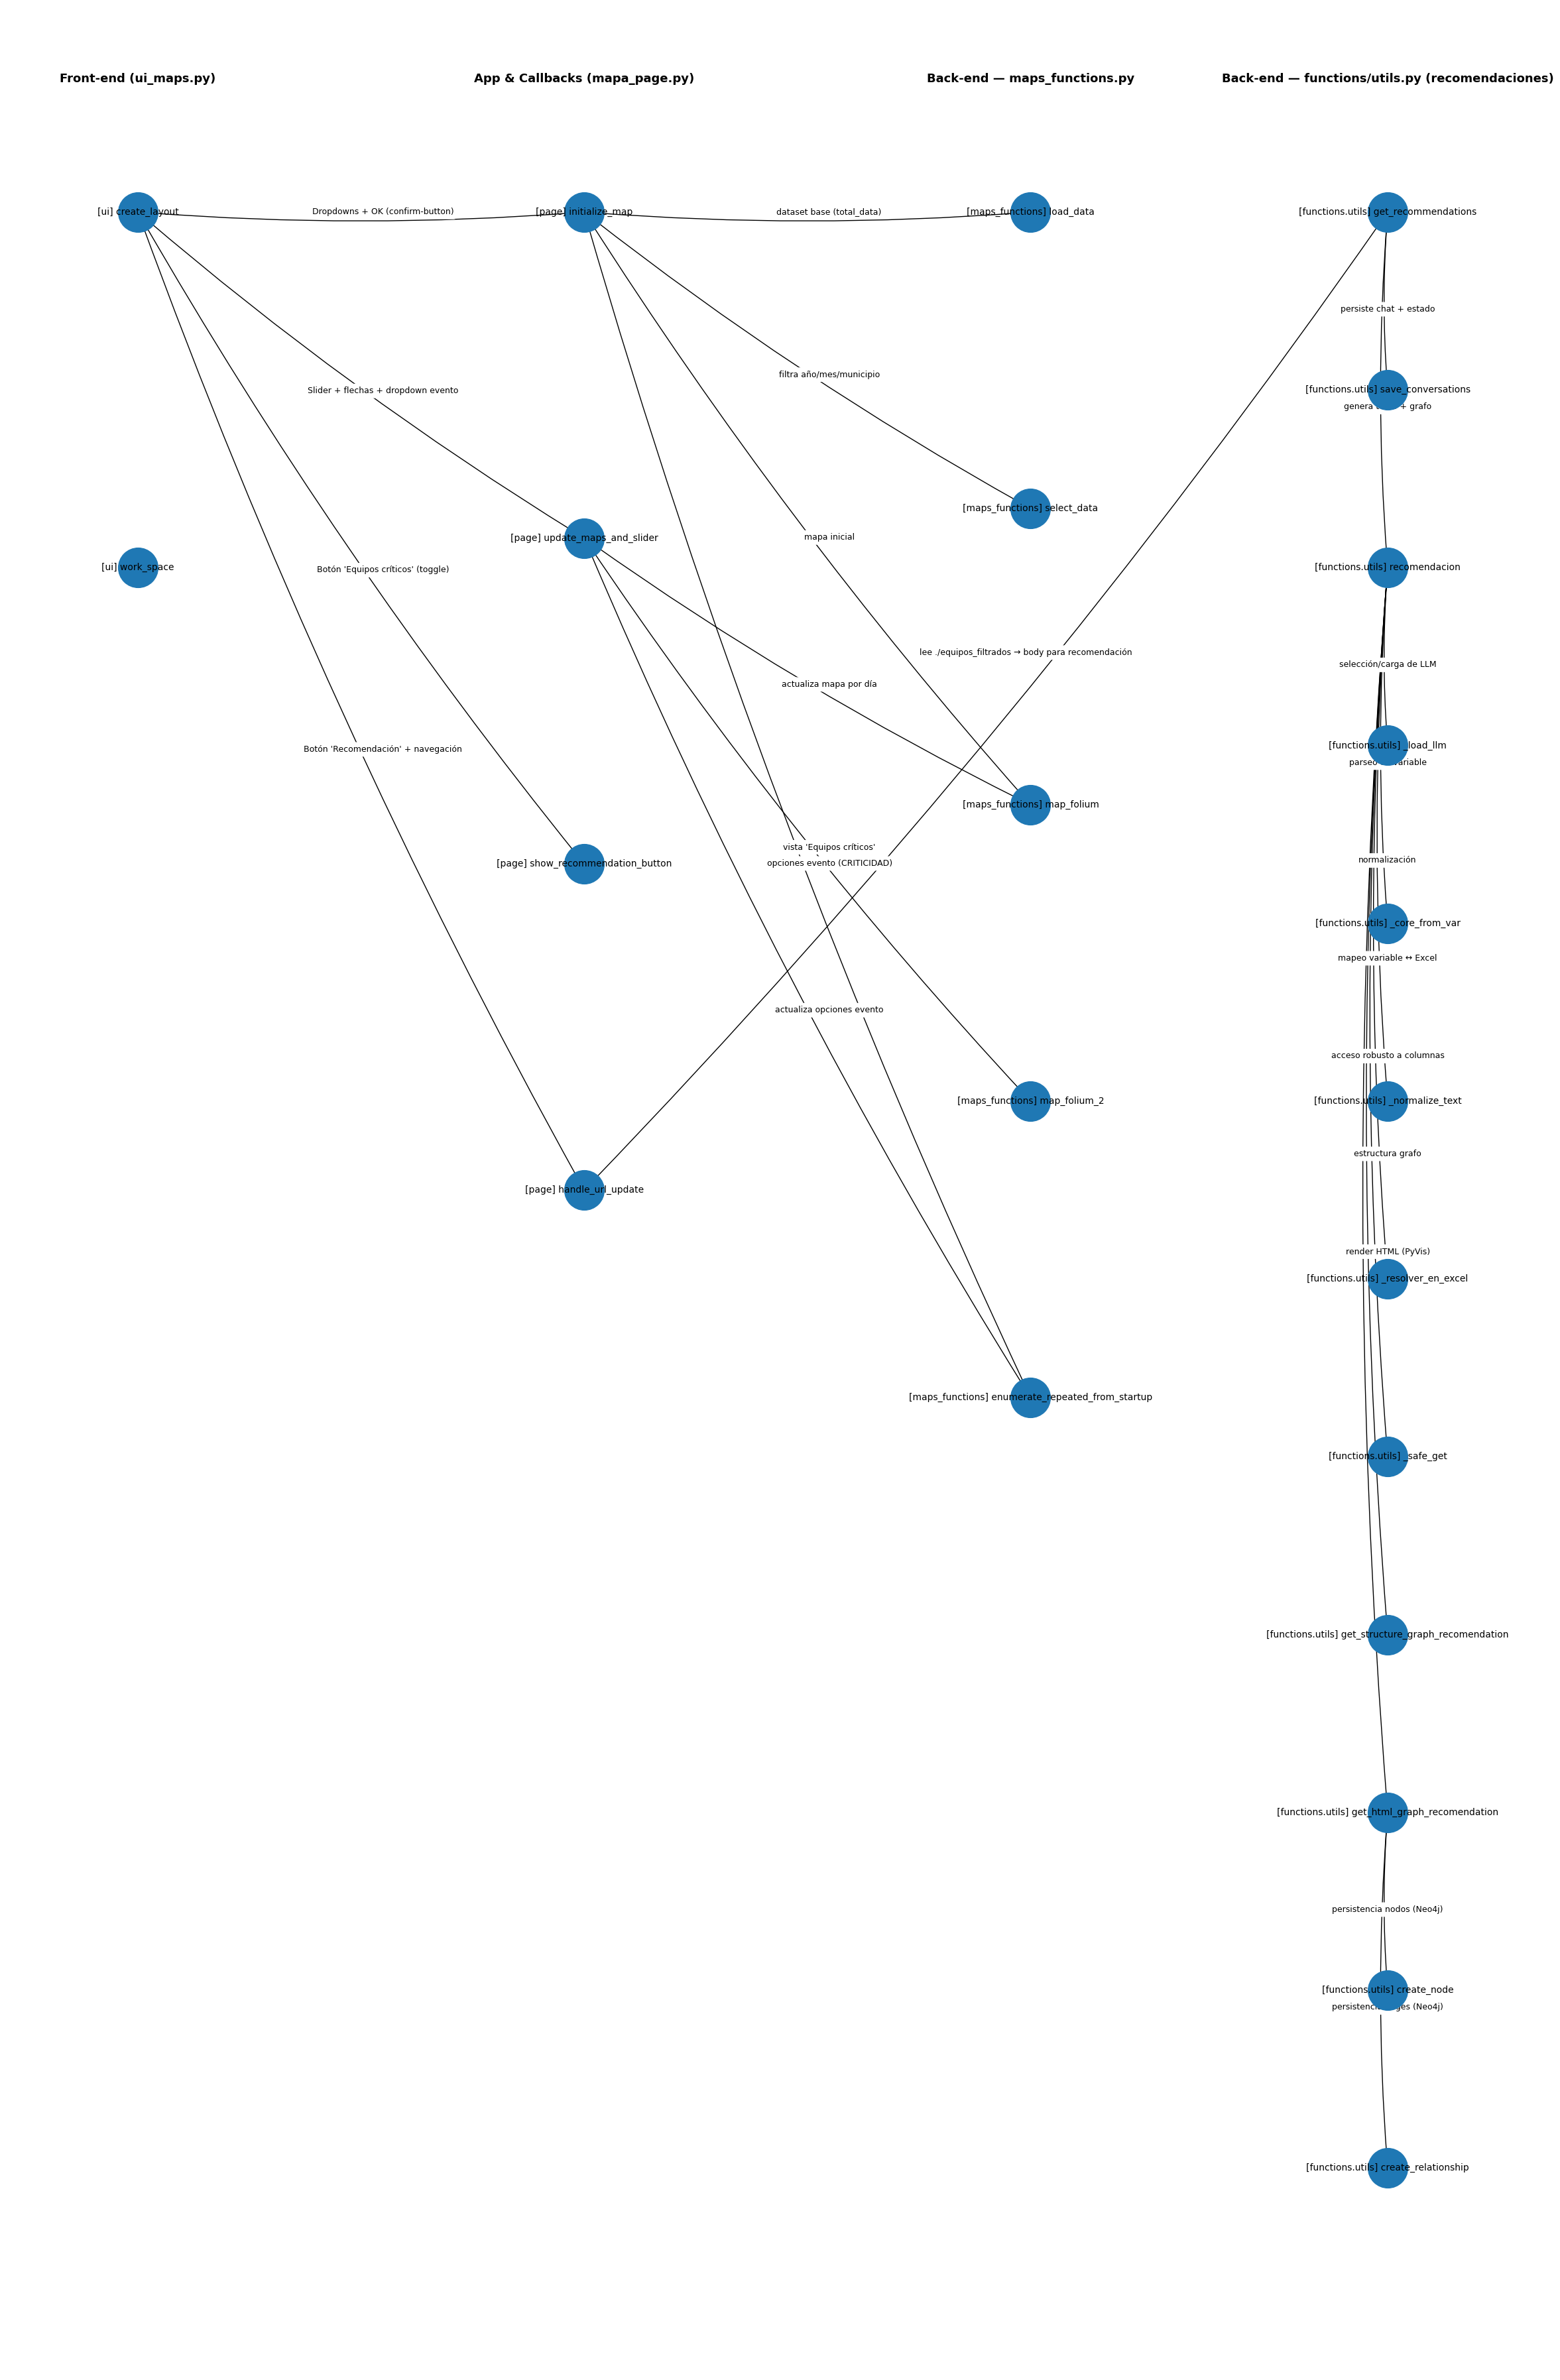

In [8]:
# @title Maps
import matplotlib.pyplot as plt
import networkx as nx

# ==== Column nodes ====
ui_nodes = [
    "[ui] create_layout",
    "[ui] work_space",
]

page_nodes = [
    "[page] initialize_map",
    "[page] update_maps_and_slider",
    "[page] show_recommendation_button",
    "[page] handle_url_update",
]

# Back-end — utils/maps_functions.py
maps_funcs_nodes = [
    "[maps_functions] load_data",
    "[maps_functions] select_data",
    "[maps_functions] map_folium",
    "[maps_functions] map_folium_2",
    "[maps_functions] enumerate_repeated_from_startup",
]

# Back-end — functions/utils.py (rama de recomendaciones)
func_utils_nodes = [
    "[functions.utils] get_recommendations",
    "[functions.utils] save_conversations",
    "[functions.utils] recomendacion",
    "[functions.utils] _load_llm",
    "[functions.utils] _core_from_var",
    "[functions.utils] _normalize_text",
    "[functions.utils] _resolver_en_excel",
    "[functions.utils] _safe_get",
    "[functions.utils] get_structure_graph_recomendation",
    "[functions.utils] get_html_graph_recomendation",
    "[functions.utils] create_node",
    "[functions.utils] create_relationship",
]

# ==== Edges (solo flujo real) ====
edges = [
    # UI -> Page
    ("[ui] create_layout", "[page] initialize_map", "Dropdowns + OK (confirm-button)"),
    ("[ui] create_layout", "[page] update_maps_and_slider", "Slider + flechas + dropdown evento"),
    ("[ui] create_layout", "[page] show_recommendation_button", "Botón 'Equipos críticos' (toggle)"),
    ("[ui] create_layout", "[page] handle_url_update", "Botón 'Recomendación' + navegación"),

    # Page -> Back-end (maps_functions.py)
    ("[page] initialize_map", "[maps_functions] load_data", "dataset base (total_data)"),
    ("[page] initialize_map", "[maps_functions] select_data", "filtra año/mes/municipio"),
    ("[page] initialize_map", "[maps_functions] map_folium", "mapa inicial"),
    ("[page] initialize_map", "[maps_functions] enumerate_repeated_from_startup", "opciones evento (CRITICIDAD)"),

    ("[page] update_maps_and_slider", "[maps_functions] map_folium", "actualiza mapa por día"),
    ("[page] update_maps_and_slider", "[maps_functions] map_folium_2", "vista 'Equipos críticos'"),
    ("[page] update_maps_and_slider", "[maps_functions] enumerate_repeated_from_startup", "actualiza opciones evento"),

    # Trigger de recomendaciones (desde página)
    ("[page] handle_url_update", "[functions.utils] get_recommendations", "lee ./equipos_filtrados → body para recomendación"),

    # Back-end (functions/utils.py) — pipeline de recomendación
    ("[functions.utils] get_recommendations", "[functions.utils] save_conversations", "persiste chat + estado"),
    ("[functions.utils] get_recommendations", "[functions.utils] recomendacion", "genera texto + grafo"),
    ("[functions.utils] recomendacion", "[functions.utils] _load_llm", "selección/carga de LLM"),
    ("[functions.utils] recomendacion", "[functions.utils] _core_from_var", "parseo de variable"),
    ("[functions.utils] recomendacion", "[functions.utils] _normalize_text", "normalización"),
    ("[functions.utils] recomendacion", "[functions.utils] _resolver_en_excel", "mapeo variable ↔ Excel"),
    ("[functions.utils] recomendacion", "[functions.utils] _safe_get", "acceso robusto a columnas"),
    ("[functions.utils] recomendacion", "[functions.utils] get_structure_graph_recomendation", "estructura grafo"),
    ("[functions.utils] recomendacion", "[functions.utils] get_html_graph_recomendation", "render HTML (PyVis)"),
    ("[functions.utils] get_html_graph_recomendation", "[functions.utils] create_node", "persistencia nodos (Neo4j)"),
    ("[functions.utils] get_html_graph_recomendation", "[functions.utils] create_relationship", "persistencia edges (Neo4j)"),
]

# ==== Build graph ====
G = nx.DiGraph()
G.add_nodes_from(ui_nodes + page_nodes + maps_funcs_nodes + func_utils_nodes)
for u, v, lbl in edges:
    G.add_edge(u, v, label=lbl)

# ==== Layout positions ====
pos = {}
def stack_positions(nodes, x, y_start=1.0, y_step=0.1):
    for i, n in enumerate(nodes):
        pos[n] = (x, y_start - i * y_step)

# Cuatro columnas: UI, Page, Back-end (maps_functions), Back-end (functions/utils)
stack_positions(ui_nodes,         x=0.08, y_start=1.00, y_step=0.12)
stack_positions(page_nodes,       x=0.38, y_start=1.00, y_step=0.11)
stack_positions(maps_funcs_nodes, x=0.68, y_start=1.00, y_step=0.10)
stack_positions(func_utils_nodes, x=0.92, y_start=1.00, y_step=0.06)

# ==== Draw ====
plt.figure(figsize=(24, 36))
nx.draw_networkx_nodes(G, pos, node_size=1850)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='-|>', arrowsize=14, connectionstyle='arc3,rad=0.04')

edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9, label_pos=0.55, rotate=False)

# ==== Column headers ====
plt.text(0.08, 1.045, "Front-end (ui_maps.py)", ha='center', va='center', fontsize=13, fontweight='bold')
plt.text(0.38, 1.045, "App & Callbacks (mapa_page.py)", ha='center', va='center', fontsize=13, fontweight='bold')
plt.text(0.68, 1.045, "Back-end — maps_functions.py", ha='center', va='center', fontsize=13, fontweight='bold')
plt.text(0.92, 1.045, "Back-end — functions/utils.py (recomendaciones)", ha='center', va='center', fontsize=13, fontweight='bold')

plt.axis('off')
out_path = "maps_call_graph_4cols.png"
plt.tight_layout()
plt.savefig(out_path, dpi=170, bbox_inches='tight')
out_path
